<a href="https://colab.research.google.com/github/nisargsonar/Aviation-Safety/blob/main/Aviation_Network_planning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install networkx numpy matplotlib

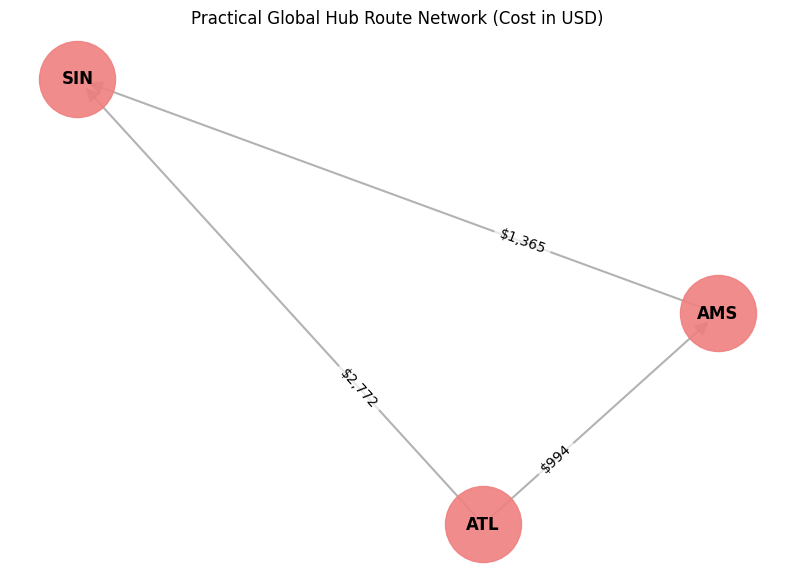


--- Optimal Route Calculation (Practical Hubs) ---
Optimal Route from ATL to SIN: ['ATL', 'AMS', 'SIN']
Total Cost: $2,359.00
Total Distance: 17,600 km


In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the graph (airports and distances)
class AirportRoutePlanning:
    def __init__(self):
        self.graph = nx.DiGraph()

    def add_airport(self, airport_code, x, y):
        """Add an airport with its code and coordinates."""
        self.graph.add_node(airport_code, pos=(x, y))

    def add_route(self, from_airport, to_airport, distance, cost_per_km, fuel_efficiency):
        """Add a flight route with distance, cost, and fuel consumption."""
        cost = distance * cost_per_km
        self.graph.add_edge(from_airport, to_airport, distance=distance, cost=cost, fuel_efficiency=fuel_efficiency)

    def plot_airports(self):
        """Plot the airports on a map (using coordinates) with a consistent, readable layout."""
        pos = nx.get_node_attributes(self.graph, 'pos')
        labels = {node: node for node in self.graph.nodes()}

        # --- Updated Plotting Logic for Consistency and Readability ---
        plt.figure(figsize=(10, 7))

        # Draw nodes with a consistent color
        nx.draw_networkx_nodes(self.graph, pos, node_size=3000, node_color='lightcoral', alpha=0.9)

        # Draw edges
        nx.draw_networkx_edges(self.graph, pos, width=1.5, alpha=0.6, edge_color='gray', arrows=True, arrowsize=20)

        # Draw labels
        nx.draw_networkx_labels(self.graph, pos, labels, font_size=12, font_weight='bold')

        # Draw edge labels (Costs) for informative visualization
        edge_labels = nx.get_edge_attributes(self.graph, 'cost')
        cost_labels = {k: f"${v:,.0f}" for k, v in edge_labels.items()}
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=cost_labels, label_pos=0.3, font_size=10, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

        plt.title("Practical Global Hub Route Network (Cost in USD)")
        plt.axis('off')
        plt.show()
        # ----------------------------------------------------------------------

    def calculate_cost(self, route):
        """Calculate the total cost of a route."""
        total_cost = 0
        total_distance = 0
        for i in range(len(route) - 1):
            edge_data = self.graph.get_edge_data(route[i], route[i + 1])
            total_cost += edge_data['cost']
            total_distance += edge_data['distance']
        return total_cost, total_distance

    def find_optimal_route(self, start_airport, end_airport):
        """Use Dijkstra’s algorithm to find the most cost-effective route."""
        shortest_path = nx.shortest_path(self.graph, source=start_airport, target=end_airport, weight='cost')
        total_cost, total_distance = self.calculate_cost(shortest_path)
        return shortest_path, total_cost, total_distance

# Step 2: Create the system and input data
if __name__ == "__main__":
    # Create the route planning object
    planner = AirportRoutePlanning()

    # Add airports (Highly practical global hubs for connectivity)
    planner.add_airport('ATL', 33.6407, -84.4277)  # Atlanta (ATL) - North America's busiest hub
    planner.add_airport('AMS', 52.3086, 4.7639)    # Amsterdam (AMS) - Major European hub
    planner.add_airport('SIN', 1.3521, 103.9550)   # Singapore (SIN) - Major Asian hub

    # Add flight routes (distance in km, cost per km in USD, fuel efficiency in liters per km)
    # The cost difference is used to make the two-leg route cheaper to show optimization at work.

    # Direct Route (Longer, slightly higher cost/km)
    planner.add_route('ATL', 'SIN', 15400, 0.18, 3.5)  # Atlanta to Singapore

    # Connecting Routes via AMS (Shorter legs, slightly lower cost/km)
    planner.add_route('ATL', 'AMS', 7100, 0.14, 2.8)   # Atlanta to Amsterdam
    planner.add_route('AMS', 'SIN', 10500, 0.13, 3.0)  # Amsterdam to Singapore

    # Visualize airports and routes
    planner.plot_airports()

    # Step 3: Find the optimal route from Atlanta (ATL) to Singapore (SIN)
    start = 'ATL'
    end = 'SIN'

    # Direct Cost: 15400 * 0.18 = $2,772.00
    # Via AMS Cost: (7100 * 0.14) + (10500 * 0.13) = $994.00 + $1,365.00 = $2,359.00
    # The optimal route should be ATL -> AMS -> SIN.

    optimal_route, total_cost, total_distance = planner.find_optimal_route(start, end)

    print(f"\n--- Optimal Route Calculation (Practical Hubs) ---")
    print(f"Optimal Route from {start} to {end}: {optimal_route}")
    print(f"Total Cost: ${total_cost:,.2f}")
    print(f"Total Distance: {total_distance:,} km")

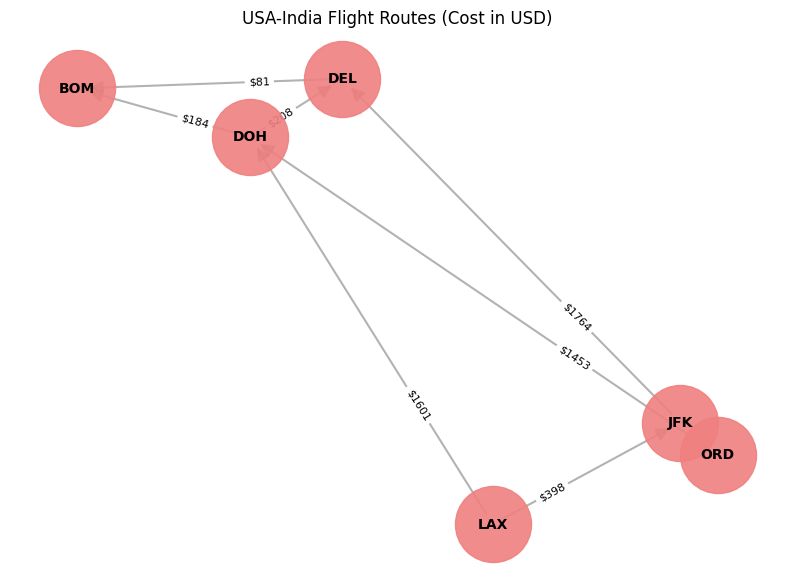

--- Optimal Route Analysis ---
Optimal Route (Cost) from LAX to BOM: ['LAX', 'DOH', 'BOM']
Total Cost: $1,784.80, Total Time: 19.5 hours, Total Distance: 15,640 km
------------------------------
Optimal Route (Time) from LAX to BOM: ['LAX', 'DOH', 'BOM']
Total Cost: $1,784.80, Total Time: 19.5 hours, Total Distance: 15,640 km


In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

class RoutePlanner:
    def __init__(self):
        self.graph = nx.DiGraph()

    def add_airport(self, airport_code, x, y):
        """Add an airport with its code and coordinates."""
        # x and y are approximate Latitude and Longitude for plotting
        self.graph.add_node(airport_code, pos=(x, y))

    def add_route(self, from_airport, to_airport, distance, cost_per_km, flight_time):
        """Add a flight route with distance (km), cost, and flight time (hours)."""
        cost = distance * cost_per_km
        self.graph.add_edge(from_airport, to_airport, distance=distance, cost=cost, flight_time=flight_time)

    def plot_airports(self):
        """Plot the airports on a map (using coordinates)."""
        pos = nx.get_node_attributes(self.graph, 'pos')
        labels = {node: node for node in self.graph.nodes()}
        plt.figure(figsize=(10, 7)) # Set plot size for better visualization

        # Draw nodes and edges
        nx.draw_networkx_nodes(self.graph, pos, node_size=3000, node_color='lightcoral', alpha=0.9)
        nx.draw_networkx_edges(self.graph, pos, width=1.5, alpha=0.6, edge_color='gray', arrows=True, arrowsize=20)
        nx.draw_networkx_labels(self.graph, pos, labels, font_size=10, font_weight='bold')

        # Optionally, draw edge weights (costs)
        edge_labels = nx.get_edge_attributes(self.graph, 'cost')
        # Only show the cost to avoid cluttering the plot with all attributes
        cost_labels = {k: f"${v:.0f}" for k, v in edge_labels.items()}
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=cost_labels, label_pos=0.3, font_size=8)

        plt.title("USA-India Flight Routes (Cost in USD)")
        plt.axis('off')
        plt.show()

    def calculate_cost(self, route):
        """Calculate the total cost, total time, and total distance of a route."""
        total_cost = 0
        total_time = 0
        total_distance = 0
        for i in range(len(route) - 1):
            # Get data for the edge between current and next airport
            edge_data = self.graph.get_edge_data(route[i], route[i + 1])
            total_cost += edge_data['cost']
            total_time += edge_data['flight_time']
            total_distance += edge_data['distance']
        return total_cost, total_time, total_distance

    def find_optimal_route(self, start_airport, end_airport, optimize='cost'):
        """Find the optimal route based on either cost or time using Dijkstra's algorithm."""
        weight_key = optimize

        # NetworkX's shortest_path function implements Dijkstra's algorithm
        try:
            shortest_path = nx.shortest_path(self.graph, source=start_airport, target=end_airport, weight=weight_key)
        except nx.NetworkXNoPath:
            return None, 0, 0, 0 # Handle case where no route exists

        total_cost, total_time, total_distance = self.calculate_cost(shortest_path)
        return shortest_path, total_cost, total_time, total_distance

# Step 3: Define Airports and Routes
if __name__ == "__main__":
    planner = RoutePlanner()

    # --- US Airports ---
    # New York (JFK), Los Angeles (LAX), Chicago (ORD)
    planner.add_airport('JFK', 40.64, -73.78)
    planner.add_airport('LAX', 33.94, -118.40)
    planner.add_airport('ORD', 41.98, -87.91)

    # --- India/Middle East Hub Airports ---
    # New Delhi (DEL), Mumbai (BOM), Doha (DOH) - common connecting hub
    planner.add_airport('DEL', 28.56, 77.10)
    planner.add_airport('BOM', 19.09, 72.86)
    planner.add_airport('DOH', 25.27, 51.53) # Doha, Qatar (Common hub)

    # --- Add flight routes (Distance in km, Cost per km in USD, Flight Time in hours) ---

    # Direct US -> India/Hub routes (Long Haul)
    planner.add_route('JFK', 'DEL', 11760, 0.15, 15.0)  # NYC to Delhi direct
    planner.add_route('LAX', 'DOH', 13340, 0.12, 16.5)  # LA to Doha (Hub)
    planner.add_route('ORD', 'DOH', 11180, 0.13, 14.0)  # Chicago to Doha (Hub)

    # Direct US -> US Domestic (for multi-leg US-originating routes)
    planner.add_route('LAX', 'JFK', 3980, 0.10, 5.5)

    # Hub -> India routes (Short/Medium Haul)
    planner.add_route('DOH', 'DEL', 2600, 0.08, 3.5)  # Doha to Delhi
    planner.add_route('DOH', 'BOM', 2300, 0.08, 3.0)  # Doha to Mumbai

    # India Domestic/Regional
    planner.add_route('DEL', 'BOM', 1150, 0.07, 2.0)

    # Plot the airports and routes
    planner.plot_airports()

    # Find optimal route from Los Angeles (LAX) to Mumbai (BOM)
    start = 'LAX'
    end = 'BOM'

    # 1. Find the most **cost-effective** route (Optimize by 'cost')
    optimal_route_cost, total_cost, total_time, total_distance = planner.find_optimal_route(start, end, optimize='cost')

    print("--- Optimal Route Analysis ---")
    if optimal_route_cost:
        print(f"Optimal Route (Cost) from {start} to {end}: {optimal_route_cost}")
        print(f"Total Cost: ${total_cost:,.2f}, Total Time: {total_time:.1f} hours, Total Distance: {total_distance:,} km")
    else:
        print(f"No route found from {start} to {end}.")

    print("-" * 30)

    # 2. Find the most **time-efficient** route (Optimize by 'time')
    optimal_route_time, total_cost_time, total_time_time, total_distance_time = planner.find_optimal_route(start, end, optimize='time')

    if optimal_route_time:
        print(f"Optimal Route (Time) from {start} to {end}: {optimal_route_time}")
        print(f"Total Cost: ${total_cost_time:,.2f}, Total Time: {total_time_time:.1f} hours, Total Distance: {total_distance_time:,} km")
    else:
        # This will usually be the same as the cost-optimized one unless a different path has lower time
        pass # Already handled by cost analysis